<div class="span5 alert alert-info">
<h2> Hospital Readmissions Data Analysis and Recommendations for Reduction</h2>

<h3> Background:</h3>
<p>In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.</p>

<h3> Exercise Directions:</h3>

<p>In this exercise, you will:</p>
<ol>
<li> critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
<li> construct a statistically sound analysis and make recommendations of your own
</ol>
<p>More instructions provided below. Include your work **in this notebook and submit to your Github account**. </p>

<h3> Resources:</h3>
<li>Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
<li> More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
<li> Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.stats as st
from scipy.stats import norm
import seaborn as sb

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
#reviewing data
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/mahesh_yerra/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


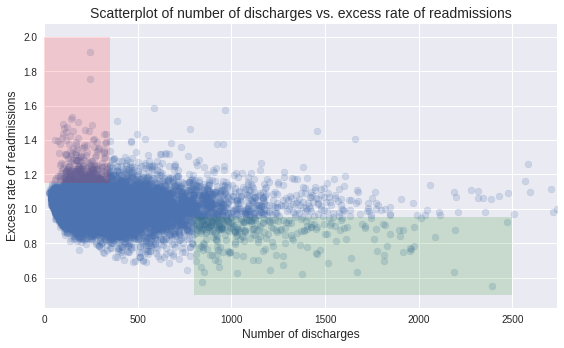

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

<div class="span5 alert alert-info">
<h1> Exercise</h1>

<p>Include your work on the following **in this notebook and submit to your Github account**. </p>

<ol>A. Do you agree with the above analysis and recommendations? Why or why not?</ol>
    
<ol>B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
<ul>
<ol>    1. Setup an appropriate hypothesis test.</ol>
<ol>    2. Compute and report the observed significance value (or p-value).</ol>
<ol>    3. Report statistical significance for $\alpha$ = .01. </ol>
<ol>    4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?</ol>
<ol>    5. Look at the scatterplot above. 
<ul>
<li>What are the advantages and disadvantages of using this plot to convey information?</li>
<li>Construct another plot that conveys the same information in a more direct manner.</li>
</ul>
</ol>


You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

**A. Do you agree with the above analysis and recommendations? Why or why not?**

*No I do not agree with above analysis*

*Above scatter plot appears to have very minimal relation between Excess readmission rates and number of discharges*

*A Correlation test would determine the relation between these variables*

**B. Provide support for your arguments and your own recommendations with a statistically sound analysis:**

**1. Setup an appropriate hypothesis test.**

**Hypothesis Test**

*H0: There is no correlation between rate of readmission and number of discharges.*

*H1: There is a correlation between rate of readmissions and number of discharges.*

**2. Compute and report the observed significance value (or p-value).**

**3. Report statistical significance for  α  = .01.**

In [6]:
#Calculate Pearson Correlation Coefficient and p-value.
st.pearsonr(clean_hospital_read_df["Number of Discharges"][pd.isnull(clean_hospital_read_df["Excess Readmission Ratio"])==False],clean_hospital_read_df["Excess Readmission Ratio"][pd.isnull(clean_hospital_read_df["Excess Readmission Ratio"])==False])

(-0.097397943510793533, 1.222547377680967e-25)

*As p-value is very low ( p-value <0.01), we can reject Null-Hypothesis. that implies theres is a correlation between number of discharges and excess readmission rate.*

*However, the strenth or correlation is very low (r ~ -0.01)*


**4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

*Practical significance as stated preliminary analysis is good for descirbing the facts in existing data set.*

*However, when we want to infer the observations to more generic dataset, statistical significance plays major role. We cannot conclude the correlations in data without performing statistical test*

*In this use-case, the effect of statistical significance is very low. Hence we can conclude that there is no strong relation between Excess-readmission rate and number of discharges.*

**5. Look at the scatterplot above.**

 *   ** What are the advantages and disadvantages of using this plot to convey information?**
 *   ** Construct another plot that conveys the same information in a more direct manner.**

*Above scattor plot just shows the data points*

*Along with data points, showing regression line between 2 variables is a good idea, as it helps to understand the correlation.*

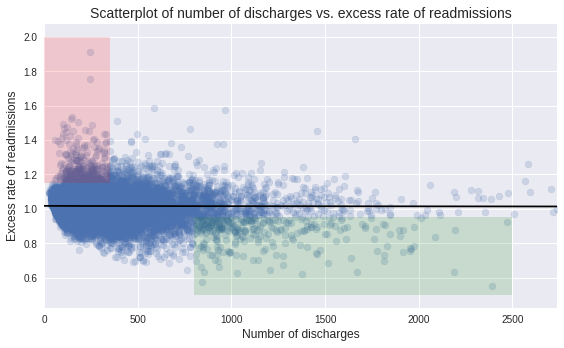

In [11]:
#Constructing scatter plot with regression line
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

fit = np.polyfit(x,y,1) # estimating regression line
fit_fn = np.poly1d(fit) 
fit_line = fit_fn(x) #defining data points to draw fit line
ax.plot(fit_line,'-k')
ax.grid(True)
fig.tight_layout()